

## Importing  all lib and dic 


In [5]:
import requests 
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns


### Getting url from ipl database

In [6]:
page=requests.get("http://howstat.com/cricket/Statistics/IPL/PlayerList.asp")


### applying soup condition for web scraping

In [7]:
pagecon=page.text
soup=BeautifulSoup(pagecon)

### extracting table data using soup 

In [8]:
table = soup.find("table",attrs={'class':'TableLined'})

rows=table.findAll("tr")


In [9]:
table = soup.find("table",attrs={'class':'TableLined'})

rows=table.findAll("tr")

data = [[td.findChildren(text=True) for td in tr.findAll("td")] for tr in rows]

    
            
#TableHeadingLeft
# for x in soup.find_all('td',attrs={'class':"TableHeadingLeft"}):
#     print(x.text)

    

###  remove the unwanted spaces in data frame

In [10]:

data = [["".join(e).strip() for e in l] for l in data]



In [11]:
# create the dataframe
df1=pd.DataFrame(data ,columns=['Name', 'Team(s)', 'Matches', 'Runs', 'Bat Avg', 'Wickets', 'Bowl Avg'])


In [12]:
#alter the index 
df1=df1.iloc[1:]

### create the csv 

In [16]:
df1.to_csv("C:\\Users\\Ganesh Ramu\\Desktop\\player.csv",index=False)
df2=pd.read_csv("C:\\Users\\Ganesh Ramu\\Desktop\\player.csv")
df2

,Name,Team(s),Matches,Runs,Bat Avg,Wickets,Bowl Avg
0,V R Aaron,"DDV, RCB, KXI, RRO, GTI",52,50,10.00,44,33.66
1,K J Abbott,KXI,5,13,13.00,2,88.50
2,S A Abbott,"RCB, SUN",3,22,7.33,1,104.00
3,Abdul Samad,SUN,25,226,14.13,2,56.50
4,Y A Abdulla,KXI,11,0,NaN,15,20.47
...,...,...,...,...,...,...,...
652,Younis Khan,RRO,1,3,3.00,0,NaN
653,Yuvraj Singh,"KXI, PWI, RCB, DDV, SUN, MIN",132,2750,24.77,36,29.92
654,A Zampa,"RPS, RCB",14,5,2.50,21,17.62
655,V H Zol,RCB,3,29,14.50,0,NaN


### data cleaning

In [14]:
df1=df1.replace('',np.nan,regex=True)
df1

,Name,Team(s),Matches,Runs,Bat Avg,Wickets,Bowl Avg
1,V R Aaron,"DDV, RCB, KXI, RRO, GTI",52,50,10.00,44,33.66
2,K J Abbott,KXI,5,13,13.00,2,88.50
3,S A Abbott,"RCB, SUN",3,22,7.33,1,104.00
4,Abdul Samad,SUN,25,226,14.13,2,56.50
5,Y A Abdulla,KXI,11,0,NaN,15,20.47
...,...,...,...,...,...,...,...
653,Younis Khan,RRO,1,3,3.00,0,NaN
654,Yuvraj Singh,"KXI, PWI, RCB, DDV, SUN, MIN",132,2750,24.77,36,29.92
655,A Zampa,"RPS, RCB",14,5,2.50,21,17.62
656,V H Zol,RCB,3,29,14.50,0,NaN


In [15]:
df2=pd.read_csv("C:\\Users\\Ganesh Ramu\\Desktop\\player.csv")
df2

,Name,Team(s),Matches,Runs,Bat Avg,Wickets,Bowl Avg
0,V R Aaron,"DDV, RCB, KXI, RRO, GTI",52,50,10.00,44,33.66
1,K J Abbott,KXI,5,13,13.00,2,88.50
2,S A Abbott,"RCB, SUN",3,22,7.33,1,104.00
3,Abdul Samad,SUN,25,226,14.13,2,56.50
4,Y A Abdulla,KXI,11,0,NaN,15,20.47
...,...,...,...,...,...,...,...
652,Younis Khan,RRO,1,3,3.00,0,NaN
653,Yuvraj Singh,"KXI, PWI, RCB, DDV, SUN, MIN",132,2750,24.77,36,29.92
654,A Zampa,"RPS, RCB",14,5,2.50,21,17.62
655,V H Zol,RCB,3,29,14.50,0,NaN


In [14]:
df2. rename(columns = {'Team(s)':'Teams'}, inplace = True)
df2

,Name,Teams,Matches,Runs,Bat Avg,Wickets,Bowl Avg
0,V R Aaron,"DDV, RCB, KXI, RRO, GTI",52,50,10.00,44,33.66
1,K J Abbott,KXI,5,13,13.00,2,88.50
2,S A Abbott,"RCB, SUN",3,22,7.33,1,104.00
3,Abdul Samad,SUN,25,226,14.13,2,56.50
4,Y A Abdulla,KXI,11,0,NaN,15,20.47
...,...,...,...,...,...,...,...
652,Younis Khan,RRO,1,3,3.00,0,NaN
653,Yuvraj Singh,"KXI, PWI, RCB, DDV, SUN, MIN",132,2750,24.77,36,29.92
654,A Zampa,"RPS, RCB",14,5,2.50,21,17.62
655,V H Zol,RCB,3,29,14.50,0,NaN


In [15]:
Team=df2['Teams'].str.split(',',n=0,expand=True)
Teams_count=[]
Team.replace("", np.nan,regex=True)
Team.columns =['A','B','C','D','E','F','G','H','I']
f=Team.count(axis=1)
c=pd.DataFrame(f,columns=['team_count'])
df2['team_count']=c.values
df2

,Name,Teams,Matches,Runs,Bat Avg,Wickets,Bowl Avg,team_count
0,V R Aaron,"DDV, RCB, KXI, RRO, GTI",52,50,10.00,44,33.66,5
1,K J Abbott,KXI,5,13,13.00,2,88.50,1
2,S A Abbott,"RCB, SUN",3,22,7.33,1,104.00,2
3,Abdul Samad,SUN,25,226,14.13,2,56.50,1
4,Y A Abdulla,KXI,11,0,NaN,15,20.47,1
...,...,...,...,...,...,...,...,...
652,Younis Khan,RRO,1,3,3.00,0,NaN,1
653,Yuvraj Singh,"KXI, PWI, RCB, DDV, SUN, MIN",132,2750,24.77,36,29.92,6
654,A Zampa,"RPS, RCB",14,5,2.50,21,17.62,2
655,V H Zol,RCB,3,29,14.50,0,NaN,1


In [54]:
j =df2.head(200)

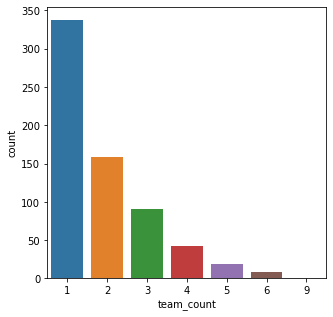

In [16]:
df2_sort_team_count=df2.sort_values("team_count",ascending=False)
o=df2.pivot_table(columns=['team_count'],aggfunc='size')
o
plt.figure(figsize=(5,5))
sns.countplot( x ='team_count', data = df2)
plt.xlabel
plt.xticks(rotation=0)
plt.show()

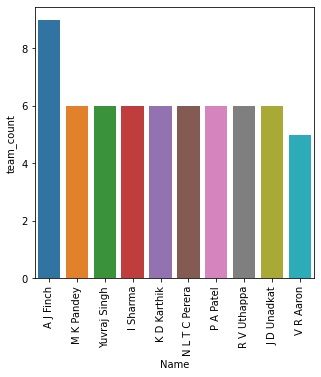

In [17]:
d3=df2.sort_values('team_count',ascending=False).head(10)
plt.figure(figsize=(5,5))
sns.barplot( x ='Name',y='team_count', data = d3)
plt.xticks(rotation=90)
plt.title("")
plt.show()

### Find the who is played different teams most
Finch is played 9 different teams 

In [18]:
#finding the best batsman.
df2=df2.assign(Best_Batsman=lambda x: (x['Matches']>100)&(x['Runs']>5500)&(x['Bat Avg']>40))

df2.groupby(['Best_Batsman']).size().reset_index(name='counts')#for find the satisfied  count of if condition 

df2['Best_Batsman'].sort_values(ascending=False)#used find the index of true 

Best_Batsman=df2['Name'][634]

Best_Batsman

'D A Warner'

#### repeating same logic to find multiple data

In [19]:
df2=df2.assign(Best_player=lambda x: (x['Matches']>100)&(x['Runs']>25)&(x['Wickets']>15))
df2.groupby(['Best_player']).size().reset_index(name='counts')
df2['Best_player'].sort_values()
Best_player=df2['Name'][444]
Best_player

'S K Raina'

In [20]:
df2=df2.assign(Best_bowler=lambda x: (x['Matches']>100)&(x['Bowl Avg']<20)&(x['Wickets']>90))
df2.groupby(['Best_bowler']).size().reset_index(name='counts')
df2['Best_bowler'].sort_values()
Best_bowler=df2['Name'][300]

Best_bowler

'S L Malinga'

In [21]:
df2.describe()

,Matches,Runs,Bat Avg,Wickets,Bowl Avg,team_count
count,657.000000,657.000000,574.000000,657.000000,405.000000,657.000000
mean,31.844749,427.267884,15.925610,15.385084,34.527802,1.896499
std,42.951940,952.502741,10.532107,29.362941,16.722901,1.195113
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.000000,9.000000,7.690000,0.000000,25.290000,1.000000
50%,13.000000,53.000000,14.475000,3.000000,30.700000,1.000000
75%,41.000000,282.000000,23.000000,14.000000,39.000000,2.000000
max,234.000000,6624.000000,55.670000,183.000000,136.000000,9.000000


In [22]:
df2.shape


(657, 11)

# Data visualisation



In [23]:
df2_sort=df2.sort_values("Matches",ascending=False)
Highest_match=df2_sort.head()#find the players .. top 5 highest matches played 
Highest_match

,Name,Teams,Matches,Runs,Bat Avg,Wickets,Bowl Avg,team_count,Best_Batsman,Best_player,Best_bowler
134,M S Dhoni,"CSK, RPS",234,4978,39.20,0,NaN,2,False,False,False
249,K D Karthik,"DDV, KXI, MIN, RCB, GUJ, KKR",229,4376,26.85,0,NaN,6,False,False,False
523,R G Sharma,"DCH, MIN",227,5879,30.30,15,32.53,2,False,False,False
268,V Kohli,RCB,223,6624,36.20,4,92.00,1,False,False,False
222,R A Jadeja,"RRO, KTK, CSK, GUJ",210,2502,26.62,132,30.79,4,False,True,False


## TOP 5 HIGHEST MATCHES PLAYED

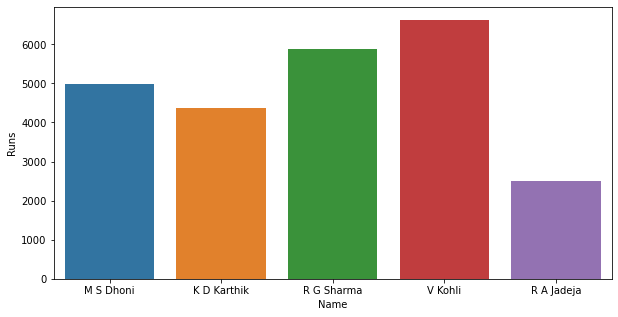

In [24]:
plt.figure(figsize=(10,5))
sns.barplot( x = Highest_match['Name'], y = Highest_match['Runs'], data = Highest_match)
plt.xticks(rotation=0)
plt.show()

### Observation -
comparing above data ,
v kohli has played highest matches along with scoring highest runs 

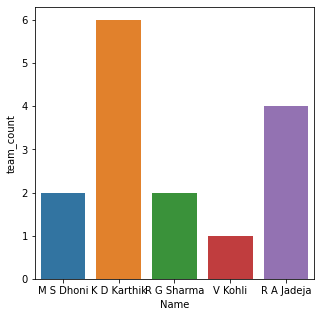

In [25]:
plt.figure(figsize=(5,5))
sns.barplot( x ='Name',y='team_count', data = Highest_match)
plt.xlabel
plt.xticks(rotation=0)
plt.show()

#### these graph represent ,,who playerd highest matches and they played in different team 

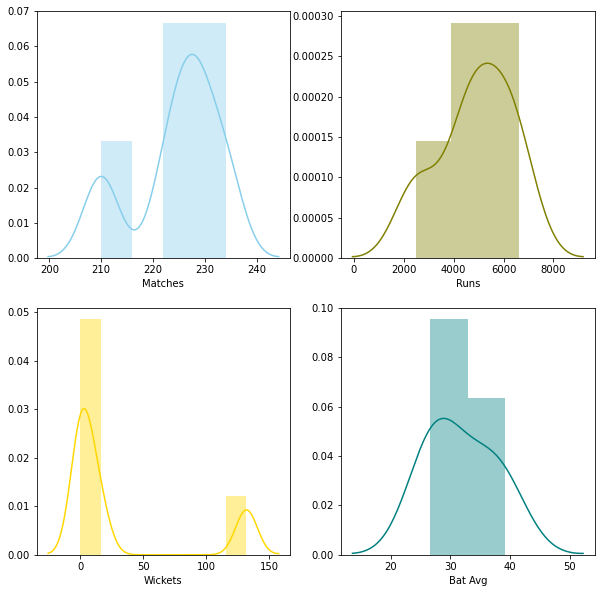

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
sns.distplot(Highest_match["Matches"],kde=True,color="skyblue", ax=axs[0, 0])
sns.distplot(Highest_match["Runs"],kde=True, color="olive", ax=axs[0, 1])
sns.distplot(Highest_match["Wickets"],kde=True,color="gold", ax=axs[1, 0])
sns.distplot(Highest_match["Bat Avg"], kde=True, color="teal", ax=axs[1, 1])
plt.show()
#below plot represent distrubution of varies elements in the extracted data

### top 5 players with highest runs

In [27]:
df2_run_sort=df2.sort_values("Runs",ascending=False)
Highest_runs=df2_run_sort.head()
Highest_runs

,Name,Teams,Matches,Runs,Bat Avg,Wickets,Bowl Avg,team_count,Best_Batsman,Best_player,Best_bowler
268,V Kohli,RCB,223,6624,36.20,4,92.00,1,False,False,False
133,S Dhawan,"DDV, MIN, DCH, SUN, KXI",206,6244,35.08,4,16.50,5,False,False,False
634,D A Warner,"DDV, SUN",162,5881,42.01,0,NaN,2,True,False,False
523,R G Sharma,"DCH, MIN",227,5879,30.30,15,32.53,2,False,False,False
444,S K Raina,"CSK, GUJ",205,5528,32.52,25,45.80,2,False,True,False


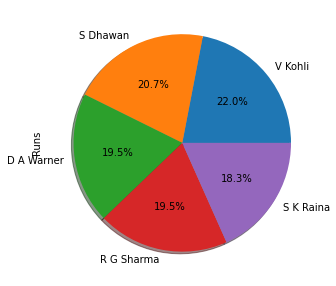

In [28]:

Best_batsman=Highest_runs.plot.pie(y='Runs',figsize=(5,5),labels=Highest_runs['Name'],legend=False,shadow=True,autopct='%1.1f%%')

### top 5 highest wkt takers

In [50]:
df2_wkt_sort=df2.sort_values("Wickets",ascending=False)
Highest_wkt=df2_wkt_sort.head()

Highest_wkt

,Name,Teams,Matches,Runs,Bat Avg,Wickets,Bowl Avg,team_count,Best_Batsman,Best_player,Best_bowler
82,D J J Bravo,"MIN, CSK, GUJ",161,1560,22.61,183,23.83,3,False,True,False
300,S L Malinga,MIN,122,88,5.50,170,19.85,1,False,True,True
332,A Mishra,"DDV, DCH, SUN",154,362,11.68,166,23.98,3,False,True,False
90,Y S Chahal,"MIN, RCB, RRO",131,37,5.29,166,21.83,3,False,True,False
98,P P Chawla,"KXI, KKR, CSK, MIN",165,584,11.68,157,27.39,4,False,True,False


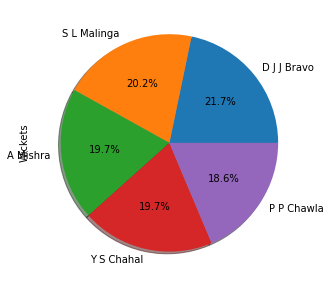

In [45]:

Best_bowlers=Highest_wkt.plot.pie(y='Wickets',figsize=(5,5),labels=Highest_wkt['Name'],legend=False,shadow=True,autopct='%1.1f%%')

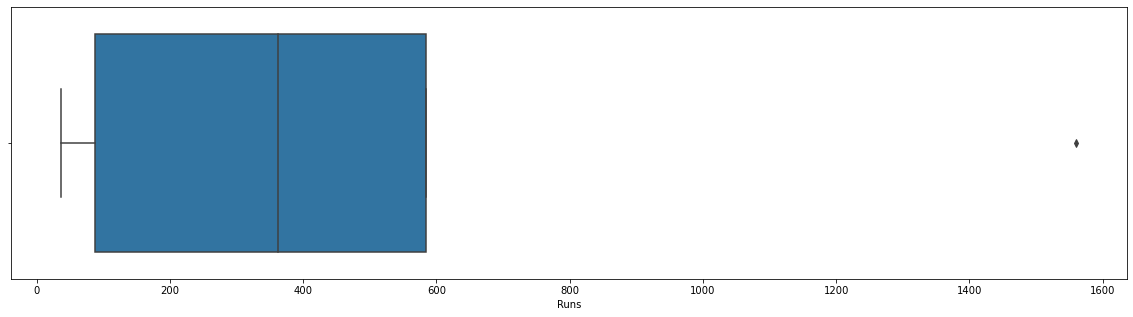

In [46]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Runs',data =Highest_wkt)
plt.show() 

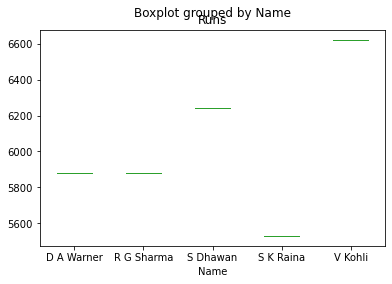

In [47]:
Highest_runs.boxplot(by ='Name' , column =['Runs'],grid= False)

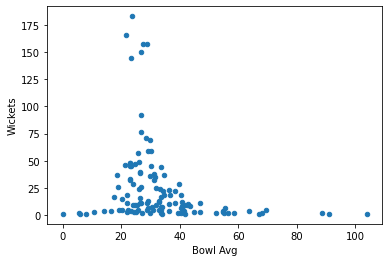

In [55]:
j.plot.scatter(x ='Bowl Avg' , y ='Wickets')

AttributeError: module 'seaborn' has no attribute 'plt'

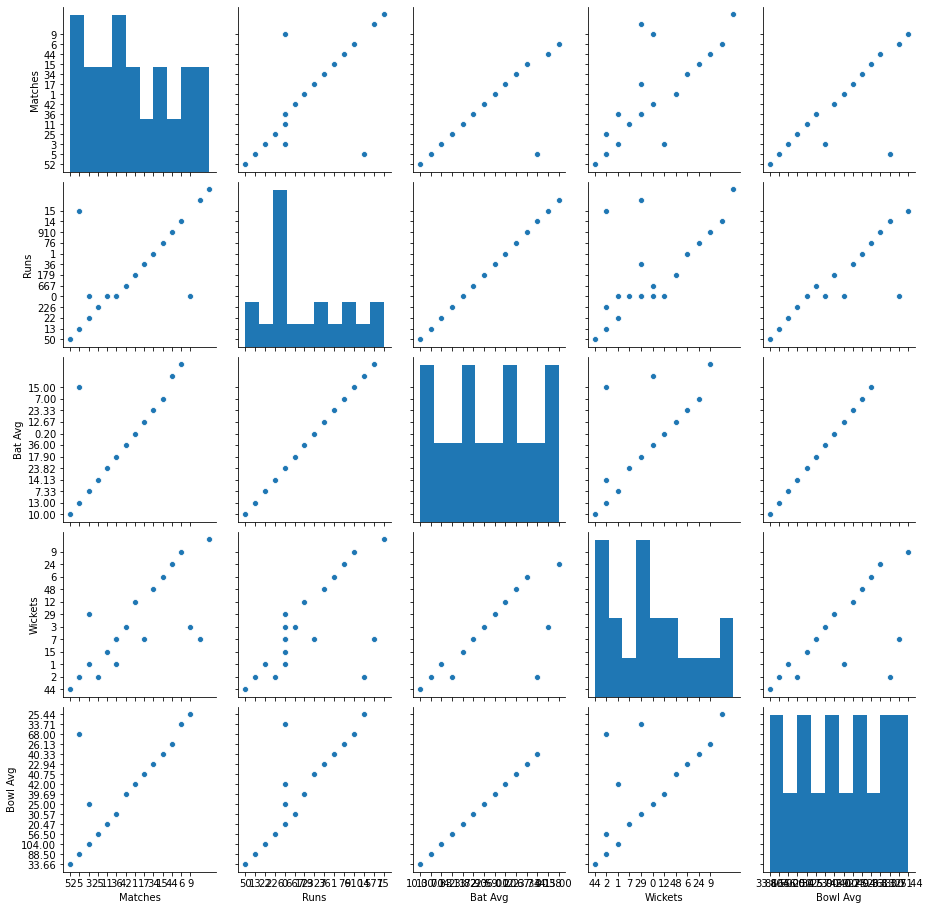

In [67]:
sns.pairplot(df1.head(20),kind="scatter")
sns.plt.show()

In [71]:
sns.heatmap(Highest_runs())

sns.plt.show()

TypeError: 'DataFrame' object is not callable